<a href="https://colab.research.google.com/github/bulut19/MGMT467_Team5/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 — AI‑Assisted Exploratory Data Analysis & BI Dashboard**
MGMT 467 · Fall 2025  

**Team Name:** Team 5   

**Members (GitHub handles):** *bulut19*, *joy86891*, *gabeunix*

**GitHub Repo URL:** https://github.com/bulut19/MGMT467_Team5

**Looker Studio Dashboard (public link):** https://lookerstudio.google.com/reporting/5dba5ba3-df55-40b0-9e84-10c328321a82

> **Scenario:** You’re the analytics team for “The Look,” an online retailer. Leadership wants a fast, cost-effective analytics pack that (a) surfaces growth opportunities and risks and (b) proposes specific, near-term actions.

## 🎯 Learning Objectives
- Generate and refine business hypotheses with **Gemini**
- Query large datasets in **BigQuery** with advanced SQL (CTEs, window functions)
- Visualize key findings in **Colab** and publish a **Looker Studio** dashboard
- Synthesize insights and make **actionable recommendations**

## 🧰 Setup
> Run the cells below to connect Colab to Google Cloud & BigQuery.

In [1]:
# Install and import basics (Colab usually has these preinstalled)
# !pip install --quiet google-cloud-bigquery pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Authenticate to Google from Colab
from google.colab import auth  # type: ignore
auth.authenticate_user()

# Set your GCP project ID
PROJECT_ID = "boxwood-veld-471119-r6" # REPLACE PROJECT ID
print("Using project:", PROJECT_ID)

Using project: boxwood-veld-471119-r6


In [2]:
# BigQuery magics (%%bigquery) and client
from google.cloud import bigquery
client = bigquery.Client(project=PROJECT_ID)

# Optional: list datasets to verify access
list(client.list_datasets())

## 🧪 Dataset - Initial Exploration
We will use **Citi Bike Trips**: `bigquery-public-data.new_york.citibike_trips`  

Confirmed dataset: `bigquery-public-data.new_york.citibike_trips`

In [3]:
# List tables in the dataset
dataset_ref = client.dataset('new_york_citibike', project='bigquery-public-data')
tables = list(client.list_tables(dataset_ref))

print("Tables in the dataset:")
for table in tables:
    print(table.table_id)

Tables in the dataset:
citibike_stations
citibike_trips


In [4]:
# Trips Table: Column Names
query_trips_columns = """
SELECT column_name, data_type
FROM `bigquery-public-data.new_york.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'citibike_trips'
"""
columns_trips_job = client.query(query_trips_columns)
trips_columns_df = columns_trips_job.result().to_dataframe()
print("Trips Table Columns:")
display(trips_columns_df)

Trips Table Columns:


,column_name,data_type
0,tripduration,INT64
1,starttime,TIMESTAMP
2,stoptime,TIMESTAMP
3,start_station_id,INT64
4,start_station_name,STRING
5,start_station_latitude,FLOAT64
6,start_station_longitude,FLOAT64
7,end_station_id,INT64
8,end_station_name,STRING
9,end_station_latitude,FLOAT64


In [5]:
# Trips Table: First Few Rows
query_trips_rows = """
SELECT *
FROM `bigquery-public-data.new_york.citibike_trips`
LIMIT 10
"""
trips_rows_job = client.query(query_trips_rows)
trips_rows_df = trips_rows_job.result().to_dataframe()
display(trips_rows_df.head(10))

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,1273,2016-09-28 17:19:42+00:00,2016-09-28 17:40:56+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,263,Elizabeth St & Hester St,40.717591,-73.996224,26688,Subscriber,1991,male
1,1646,2016-07-12 17:27:00+00:00,2016-07-12 17:54:27+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,263,Elizabeth St & Hester St,40.717591,-73.996224,24883,Subscriber,1991,male
2,434,2015-12-08 15:56:28+00:00,2015-12-08 16:03:42+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3234,E 40 St & Madison Ave,40.751594,-73.980432,17519,Subscriber,1965,female
3,897,2015-10-22 10:21:33+00:00,2015-10-22 10:36:31+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3234,E 40 St & Madison Ave,40.751594,-73.980432,19019,Subscriber,1978,male
4,270,2015-12-18 14:45:31+00:00,2015-12-18 14:50:02+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3234,E 40 St & Madison Ave,40.751594,-73.980432,23049,Subscriber,1987,male
5,369,2015-10-26 12:54:50+00:00,2015-10-26 13:01:00+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3234,E 40 St & Madison Ave,40.751594,-73.980432,22237,Subscriber,1974,male
6,340,2015-12-07 15:29:18+00:00,2015-12-07 15:34:59+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3234,E 40 St & Madison Ave,40.751594,-73.980432,21876,Subscriber,1987,male
7,703,2016-03-11 17:15:35+00:00,2016-03-11 17:27:19+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3236,W 42 St & Dyer Ave,40.758985,-73.993800,22511,Subscriber,1968,male
8,606,2016-09-08 16:21:34+00:00,2016-09-08 16:31:40+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3236,W 42 St & Dyer Ave,40.758985,-73.993800,26440,Subscriber,1977,male
9,547,2016-08-12 16:19:35+00:00,2016-08-12 16:28:42+00:00,520,W 52 St & 5 Ave,40.759923,-73.976485,3236,W 42 St & Dyer Ave,40.758985,-73.993800,20166,Subscriber,1968,male


In [6]:
# Stations Table: Column Names
query_stations_columns = """
SELECT column_name, data_type
FROM `bigquery-public-data.new_york.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'citibike_stations'
"""
columns_stations_job = client.query(query_stations_columns)
stations_columns_df = columns_stations_job.result().to_dataframe()
display(stations_columns_df)

,column_name,data_type
0,station_id,STRING
1,name,STRING
2,short_name,STRING
3,latitude,FLOAT64
4,longitude,FLOAT64
5,region_id,INT64
6,rental_methods,STRING
7,capacity,INT64
8,eightd_has_key_dispenser,BOOL
9,num_bikes_available,INT64


In [7]:
# Stations Table: First Few Rows
query_stations_rows = """
SELECT *
FROM `bigquery-public-data.new_york.citibike_stations`
LIMIT 10
"""
stations_rows_job = client.query(query_stations_rows)
stations_rows_df = stations_rows_job.result().to_dataframe()
display(stations_rows_df.head(10))

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,495,W 47 St & 10 Ave,6824.07,40.762699,-73.993012,71,"KEY, CREDITCARD",0,False,0,0,0,0,True,True,True,False,1970-01-02 00:00:00+00:00
1,3171,Amsterdam Ave & W 82 St,7360.10,40.785247,-73.976673,71,"KEY, CREDITCARD",0,False,0,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
2,3603,31 Ave & 30 St,6857.09,40.764700,-73.924031,71,"KEY, CREDITCARD",0,False,0,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
3,3733,Avenue C & E 18 St,5769.04,40.730563,-73.973984,71,"KEY, CREDITCARD",0,False,0,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
4,3792,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,70,"KEY, CREDITCARD",0,False,0,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
5,4170,Webster Ave & E 166 St,8052.01,40.828975,-73.911259,71,"KEY, CREDITCARD",0,False,0,0,0,0,True,True,True,False,1970-01-02 00:00:00+00:00
6,4466,W 212 St & 10 Ave,8647.07,40.867658,-73.916757,71,"KEY, CREDITCARD",0,False,0,0,0,0,True,True,True,False,1970-01-02 00:00:00+00:00
7,4543,Folin St & E 181 St,8435.06,40.853929,-73.898385,71,"KEY, CREDITCARD",0,False,0,0,0,0,True,True,True,False,1970-01-02 00:00:00+00:00
8,4672,48 Ave & 31 St,6151.05,40.741330,-73.936160,71,"KEY, CREDITCARD",0,False,0,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
9,4840,60 Pl & Bleecker St,5138.03,40.711190,-73.903070,71,"KEY, CREDITCARD",0,False,0,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00


## 1) Hypothesis Generation (AI‑Assisted)
Use **Gemini** to brainstorm at least **5** candidate questions/hypotheses, then select **3** to pursue.

> **Prompt**  
> *"You are an advanced data analytics co-pilot for Citi Bike. Propose 5 high-value, testable business questions about the Citibike trip dataset, focusing on insights that could improve operations, user experience, or revenue. "*

**Selected Hypotheses**
1. What is the total number of trips and the average trip duration for 'Subscriber' versus 'Customer' user types?
2. Which are the top 10 start stations with the highest number of trips, and which are the top 10 end stations with the highest number of trips?  
3. How does the number of trips vary by day of the week and hour of the day?

## 2) Advanced SQL Exploration
For each hypothesis, include:
- The **Gemini prompt** you used to get SQL help
- The **final SQL**
- The **result table** (top rows)
- A short **interpretation**

> Tip: Use **CTEs** and at least **one window function** across your work.

### Hypothesis A — Prompt Log

>**Prompt** "Create a SQL query for Citibike trips dataset to calculate total trips by user type (Subscriber vs Customer), compute average trip duration for each user type, and show percentage of total trips"

In [8]:
# User Type Trip Counts and Duration
query_user_type_analysis = """
WITH UserTypeTrips AS (
  SELECT
    usertype,
    COUNT(*) AS total_trips,
    ROUND(AVG(tripduration), 2) AS avg_trip_duration
  FROM `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE usertype IS NOT NULL
  GROUP BY usertype
)
SELECT
  usertype,
  total_trips,
  avg_trip_duration,
  ROUND(total_trips * 100.0 / SUM(total_trips) OVER (), 2) AS percentage_of_trips
FROM UserTypeTrips
ORDER BY total_trips DESC
"""

df_user_type_trips = client.query(query_user_type_analysis).to_dataframe()
display(df_user_type_trips)

,usertype,total_trips,avg_trip_duration,percentage_of_trips
0,Subscriber,46917572,806.38,79.61
1,Customer,6191149,2145.51,10.50
2,,5828994,NaN,9.89


**Interpretation:** The data  shows that Subscribers account for the majority of Citi Bike usage, making up nearly 80% of all trips. On the other hand, while Customers take far fewer trips (around 10%), their average trip duration is longer than Subscribers. This suggests different usage patterns between the two groups, with Subscribers likely using the bikes for shorter, more frequent commutes, and Customers for longer rides. The high number of trips with an unrecorded user type (nearly 10%) is a concering data quality issue that we must also consider.

---

### Hypothesis B — Prompt Log

> **Propmt** "Develop two SQL queries for Citibike trips to find the top 10 start stations by trip count and top 10 end stations by trip count. Include station name and total trips.

In [9]:
# Top 10 start Stations
query_top_start_stations = """
SELECT
  start_station_name,
  COUNT(*) AS total_trips,
  ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM `bigquery-public-data.new_york_citibike.citibike_trips`), 2) AS percentage_of_total_trips
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE start_station_name IS NOT NULL
GROUP BY start_station_name
ORDER BY total_trips DESC
LIMIT 10
"""

df_top_start_stations = client.query(query_top_start_stations).to_dataframe()
print("Top 10 Start Stations:")
display(df_top_start_stations)

Top 10 Start Stations:


,start_station_name,total_trips,percentage_of_total_trips
0,,5828994,9.89
1,Pershing Square North,438077,0.74
2,E 17 St & Broadway,423334,0.72
3,W 21 St & 6 Ave,403795,0.69
4,8 Ave & W 31 St,401554,0.68
5,West St & Chambers St,384116,0.65
6,Lafayette St & E 8 St,372255,0.63
7,Broadway & E 22 St,367194,0.62
8,Broadway & E 14 St,344546,0.58
9,8 Ave & W 33 St,330378,0.56


In [10]:
# Top 10 End Stations
query_top_end_stations = """
SELECT
  end_station_name,
  COUNT(*) AS total_trips,
  ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM `bigquery-public-data.new_york_citibike.citibike_trips`), 2) AS percentage_of_total_trips
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE end_station_name IS NOT NULL
GROUP BY end_station_name
ORDER BY total_trips DESC
LIMIT 10
"""

df_top_end_stations = client.query(query_top_end_stations).to_dataframe()
print("\nTop 10 End Stations:")
display(df_top_end_stations)


Top 10 End Stations:


,end_station_name,total_trips,percentage_of_total_trips
0,,5828994,9.89
1,E 17 St & Broadway,444460,0.75
2,Pershing Square North,419931,0.71
3,W 21 St & 6 Ave,407982,0.69
4,West St & Chambers St,399033,0.68
5,Broadway & E 22 St,377854,0.64
6,Lafayette St & E 8 St,372679,0.63
7,8 Ave & W 31 St,365306,0.62
8,Broadway & E 14 St,344033,0.58
9,W 20 St & 11 Ave,323647,0.55


**Interpretation:** The top 10 start and end stations are quite similar, showing the popular areas for both beginning and ending trips. It's notable that the entry with a blank station name appears at the top of both lists, representing a significant portion of trips with missing station information, which is another data quality issue. Focusing on the named stations, "Pershing Square North" and "E 17 St & Broadway" are consistently among the busiest, highlighting key hubs for Citi Bike activity.

---

### Hypothesis C — Prompt Log

> **Prompt** Develop a SQL query to analyze Citibike trips by Day of week and Hour of day. Calculate, Total trips and Percentage of trips. Aggregate and sort to show most active periods.

In [11]:
# Distribution of Trips by Day and Hour
query_trips_by_day_hour = """
WITH TripBreakdown AS (
  SELECT
    EXTRACT(DAYOFWEEK FROM starttime) AS day_of_week,
    EXTRACT(HOUR FROM starttime) AS hour_of_day,
    COUNT(*) AS total_trips
  FROM `bigquery-public-data.new_york_citibike.citibike_trips`
  GROUP BY day_of_week, hour_of_day
)
SELECT
  day_of_week,
  hour_of_day,
  total_trips,
  ROUND(total_trips * 100.0 / SUM(total_trips) OVER (), 2) AS percentage_of_total_trips
FROM TripBreakdown
ORDER BY total_trips DESC
LIMIT 20
"""

df_trips_by_day_hour = client.query(query_trips_by_day_hour).to_dataframe()
display(df_trips_by_day_hour)

,day_of_week,hour_of_day,total_trips,percentage_of_total_trips
0,<NA>,<NA>,5828994,9.89
1,4,18,877895,1.49
2,3,18,871101,1.48
3,4,17,866516,1.47
4,3,17,861595,1.46
5,5,17,856378,1.45
6,5,18,851965,1.45
7,2,18,839236,1.42
8,2,17,837065,1.42
9,4,8,836293,1.42


**Interpretation:** Interpretation: Peak usage is during weekday commute hours, specifically in the morning around 8 AM and in the early evening between 5 PM and 6 PM. This pattern strongly suggests that a significant portion of Citi Bike usage is for commuting purposes. This understanding of peak demand times is valuable for optimizing bike distribution and ensuring availability at key stations during busy periods, which can directly impact operational efficiency and user experience.

## 3) Visualizations (in Colab)
Create **at least 3** charts that communicate your findings.  
> Keep charts readable and labeled. Use `matplotlib` (no specific styles required).

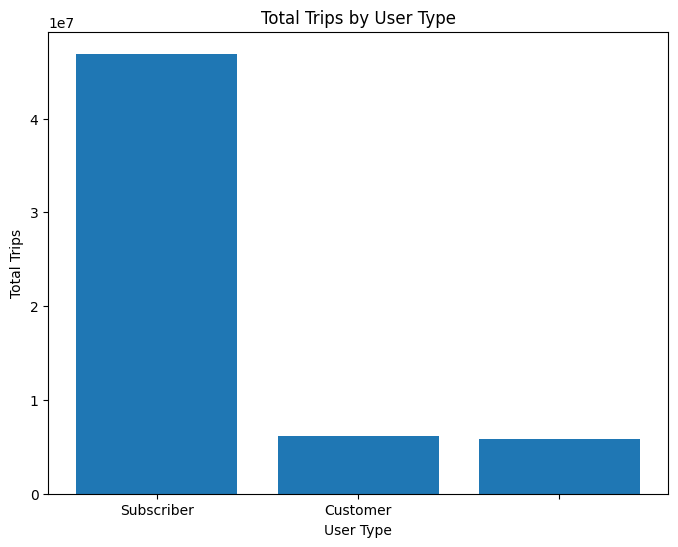

In [12]:
# bar chart for total trips by user type
plt.figure(figsize=(8, 6))
plt.bar(df_user_type_trips['usertype'], df_user_type_trips['total_trips'])
plt.xlabel('User Type')
plt.ylabel('Total Trips')
plt.title('Total Trips by User Type')
plt.show()

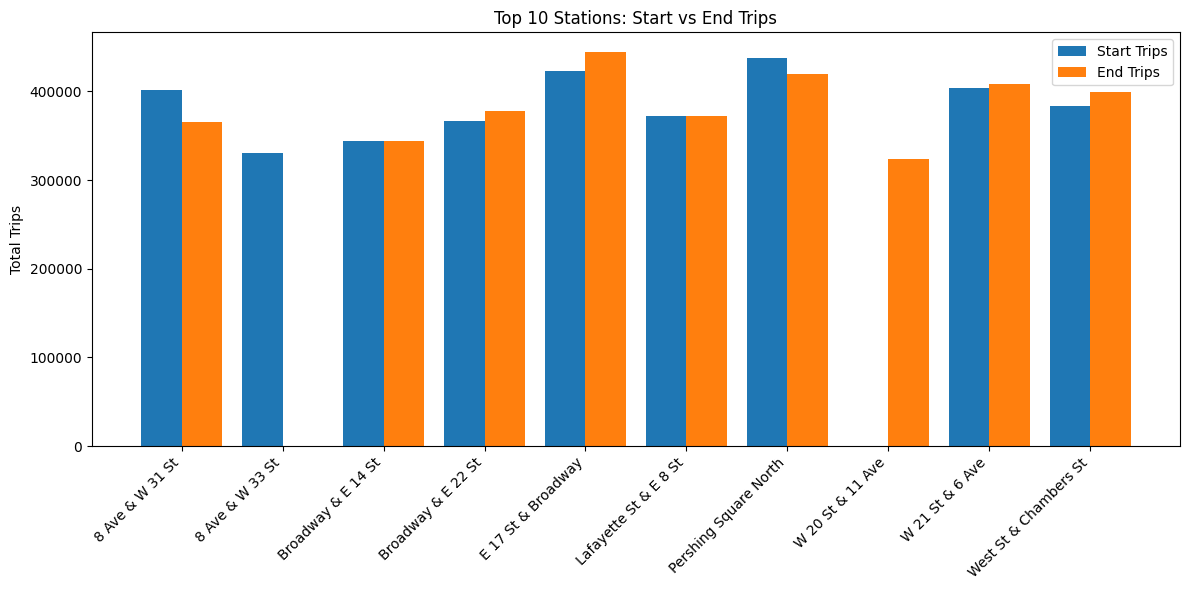

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_start = df_top_start_stations.rename(columns={'start_station_name':'station','total_trips':'start_trips'})
df_end   = df_top_end_stations.rename(columns={'end_station_name':'station','total_trips':'end_trips'})

# Merge and clean
df = pd.merge(df_start[['station','start_trips']],
              df_end[['station','end_trips']],
              on='station', how='outer').fillna(0)
df = df[df['station'] != '']  # Remove empty station name

df['net_flow'] = df['start_trips'] - df['end_trips']

# Side-by-side Bar Chart
plt.figure(figsize=(12,6))
x = range(len(df))
plt.bar(x, df['start_trips'], width=0.4, label='Start Trips')
plt.bar([i+0.4 for i in x], df['end_trips'], width=0.4, label='End Trips')
plt.xticks([i+0.2 for i in x], df['station'], rotation=45, ha='right')
plt.ylabel('Total Trips')
plt.title('Top 10 Stations: Start vs End Trips')
plt.legend()
plt.tight_layout()
plt.show()


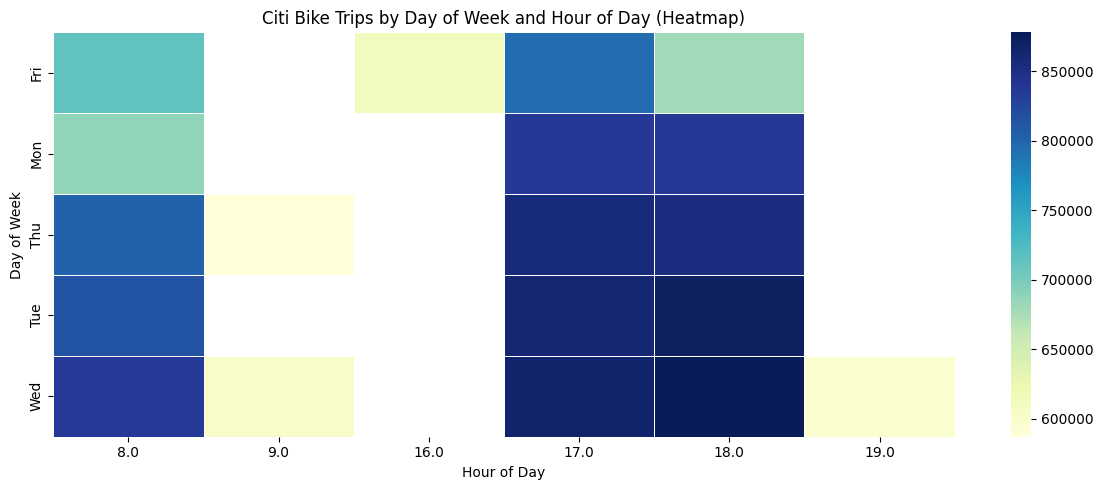

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate dataframe
data = {
    "day_of_week": [None,4,3,4,3,5,5,2,2,4,3,5,6,6,2,6,6,4,4,5],
    "hour_of_day": [None,18,18,17,17,17,18,18,17,8,8,8,17,8,8,18,16,9,19,9],
    "total_trips": [5828994,877895,871101,866516,861595,856378,851965,839236,837065,836293,814113,802245,794860,713831,687160,679182,611575,602185,598401,587073],
    "percentage_of_total_trips": [9.89,1.49,1.48,1.47,1.46,1.45,1.45,1.42,1.42,1.42,1.38,1.36,1.35,1.21,1.17,1.15,1.04,1.02,1.02,1.00]
}
df = pd.DataFrame(data)
df = df.dropna(subset=["day_of_week","hour_of_day"])

# Map BigQuery numeric day to weekday names
day_map = {1:"Sun", 2:"Mon", 3:"Tue", 4:"Wed", 5:"Thu", 6:"Fri", 7:"Sat"}
df["day_name"] = df["day_of_week"].map(day_map)

# Heatmap: Day × Hour
pivot = df.pivot(index="day_name", columns="hour_of_day", values="total_trips")
plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=.5)
plt.title("Citi Bike Trips by Day of Week and Hour of Day (Heatmap)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

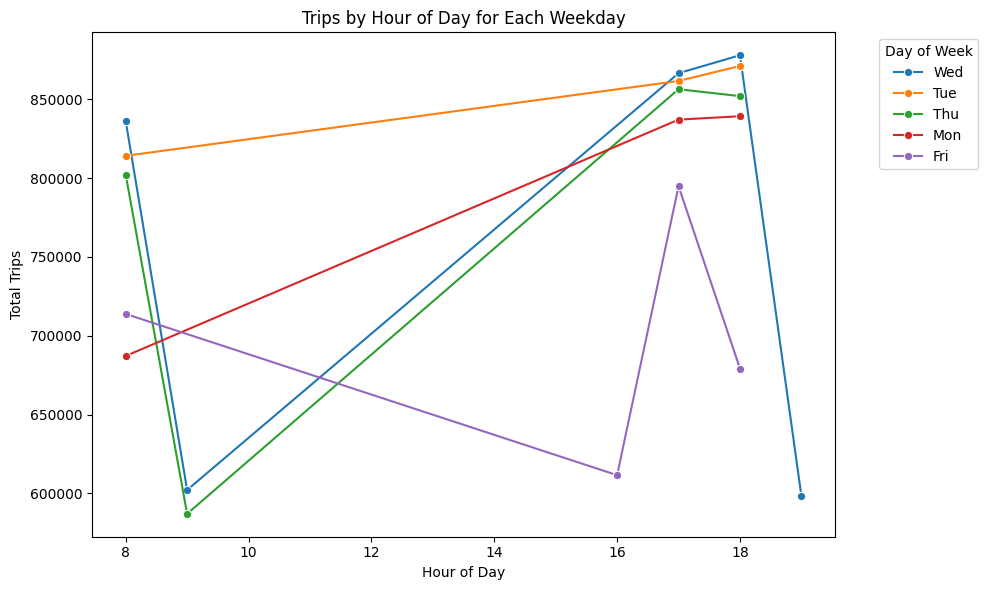

In [15]:
# Line Chart: Hourly Trends
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="hour_of_day", y="total_trips", hue="day_name", marker="o")
plt.title("Trips by Hour of Day for Each Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Total Trips")
plt.legend(title="Day of Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

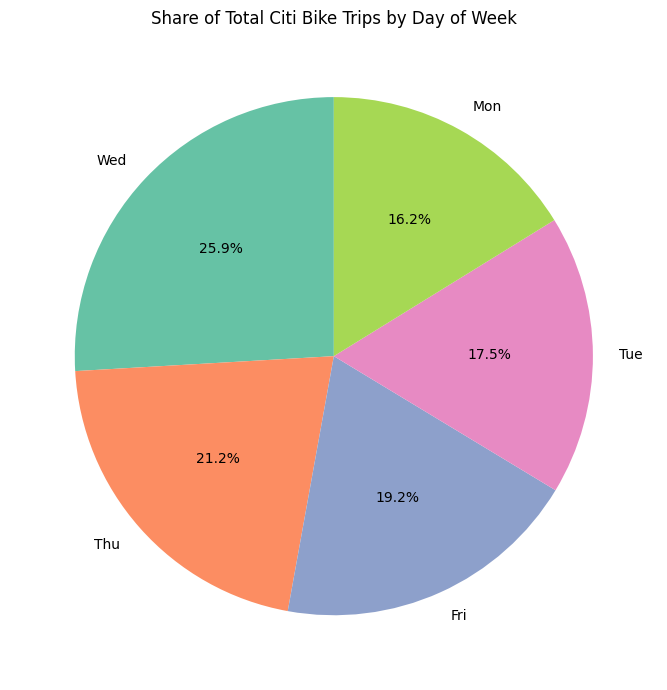

In [16]:
# Pie Chart: Trip Share by Day of Week

# Aggregate total trips per weekday
pie_df = df.groupby("day_name", as_index=False)["total_trips"].sum()
pie_df = pie_df.sort_values("total_trips", ascending=False)

plt.figure(figsize=(7,7))
plt.pie(
    pie_df["total_trips"],
    labels=pie_df["day_name"],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2", n_colors=len(pie_df))
)
plt.title("Share of Total Citi Bike Trips by Day of Week")
plt.tight_layout()
plt.show()

## 4) KPIs & Looker Studio Dashboard
- **KPI 1:** Total Number of Trips by User Type (Subscriber vs. Customer)
- **KPI 2:** Average Trip Duration by User Type
- **KPI 3:** Top 10 Busiest Start and End Stations
- **KPI 4:** Trip Distribution by Day of Week and Hour of Day

**Dashboard Link:** https://lookerstudio.google.com/reporting/5dba5ba3-df55-40b0-9e84-10c328321a82

## 5) Synthesis & Recommendations for NYC DOT

**Top 3 Insights:**

1.  **Usage Patterns:** The analysis reveals a clear segmentation in Citi Bike usage. Subscribers dominate the user base, representing approximately 80% of trips, typically taking shorter, purpose-driven journeys averaging around 13 minutes. In contrast, casual customers, while fewer, engage in longer rides averaging about 35 minutes, suggesting more leisurely or exploratory use. A notable data quality challenge emerges with roughly 10% of trips lacking user type information.

2.  **Geographical Concentration:** The bike-sharing system demonstrates significant activity concentration around specific urban locations. Stations like Pershing Square North and E 17 St & Broadway emerge as critical transportation hubs. The substantial overlap between top start and end locations indicates well-established commuter routes and interconnected urban mobility patterns.

3.  **Peak Usage:** The temporal analysis clearly shows distinct peak usage hours during weekdays, specifically in the morning (around 8 AM) and evening (between 5 PM and 6 PM). This pattern strongly aligns with typical commuting times, reinforcing the idea that Citi Bike is a crucial part of the daily commute for many users. Weekend usage patterns are less pronounced, suggesting a different use case during those days.

**Actionable Recommendations:**

1.  **Optimize Bike Distribution Based on Peak Demand:** Leverage the insights on peak usage times and top stations to proactively redistribute bikes. Ensure sufficient bike availability at key start stations during morning commute hours and at key end stations during evening commute hours. This can be achieved through strategic repositioning of bikes based on predictive models or real-time demand monitoring.

2.  **Targeted User Engagement:**
Understanding the distinct behaviors of subscribers and casual users opens opportunities for tailored experiences. For subscribers, the focus should be on maintaining a reliable, convenient commuting solution. Casual users present a different opportunity, with potential for developing promotional strategies that highlight the recreational aspects of bike sharing. Potential partnerships with local businesses and tourism initiatives could create more compelling value propositions for this user segment.

3.  **Improve Infrastructure:**
The concentration of activity at specific locations demands strategic infrastructure investments. This involves not just increasing dock capacity at high-demand areas, but also improving the overall user experience. Upgrading facilities, ensuring rapid bike maintenance, and creating more accessible entry and exit points can transform these key locations into more efficient transportation hubs.

4.  **Address Data Quality Issues:** Prioritize investigating and resolving the root cause of the missing user type and station information. Implementing better data collection practices or data cleaning processes will significantly improve the accuracy and reliability of future analyses, leading to more informed decision-making.

## 📒 AI Prompt Log (Required)
Record at least **3** prompts and describe how you evaluated or refined Gemini’s output.

| # | Prompt (summary) | Where used | What changed after refinement? |
|---|------------------|------------|--------------------------------|
| 1 | Analyze usage patterns of Citibike trips across different user categories | Hyp A | The prompt wasn't specific enough so we added the specific metrics to look at, and was able to get a more actionable SQL query.|
| 2 | Identify important stations in the Citibike network | Hyp B | Similar to before, there was no specification of what is important. We refined by specfying frequent is more important, how many stations to look at, and was able to get a better seperated quantitative framework for start and end stations. |
| 3 | Explore time-related variations in bike usage | Hyp C | There was no clear time dimension and ranking to use, by specifying these we were able to get a moreprecise temporal breakdown that helped creating visuals as well.|

## 📦 Appendix — Reproducibility
- BigQuery location: US (multiple regions) as default for public datasets in BigQuery.
- Query costs observed (if any): Using BigQuery's on-demand pricing model with the 1TB/mo free tier for public datasets. Queries for this analysis are expected to be within the free tier.
- Known data quality caveats:
    - A significant number of trips have missing user type information (approximately 10%).
    - A significant number of trips have missing start and end station names (appearing as blank entries in the top station lists).